# House Price Prediction

## Load the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True) # Remove null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Data Exploration

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop(["median_house_value"], axis=1) # Data without the column whose values we want to predict
y = data["median_house_value"] # The column whose values we want to predict

In [10]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [11]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Split the data into training and testing datasets

In [13]:
train_data = X_train.join(y_train)

In [14]:
train_data # Training related data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9248,-120.07,36.96,34.0,1457.0,239.0,557.0,226.0,3.6181,INLAND,96500.0
9136,-118.40,34.41,22.0,4443.0,560.0,1573.0,496.0,10.0285,<1H OCEAN,500001.0
11223,-117.94,33.81,33.0,1891.0,334.0,932.0,343.0,4.2759,<1H OCEAN,238000.0
10316,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,<1H OCEAN,304900.0
12862,-121.39,38.69,30.0,2897.0,506.0,1508.0,478.0,3.8650,INLAND,88400.0
...,...,...,...,...,...,...,...,...,...,...
8168,-118.15,33.80,44.0,1886.0,399.0,1167.0,372.0,3.1042,NEAR OCEAN,219800.0
10311,-117.77,33.88,8.0,4874.0,627.0,2070.0,619.0,8.1117,<1H OCEAN,410200.0
16234,-121.31,37.97,45.0,2604.0,454.0,988.0,442.0,3.6667,INLAND,123100.0
16543,-121.23,37.79,23.0,1985.0,424.0,1198.0,389.0,2.7734,INLAND,116800.0


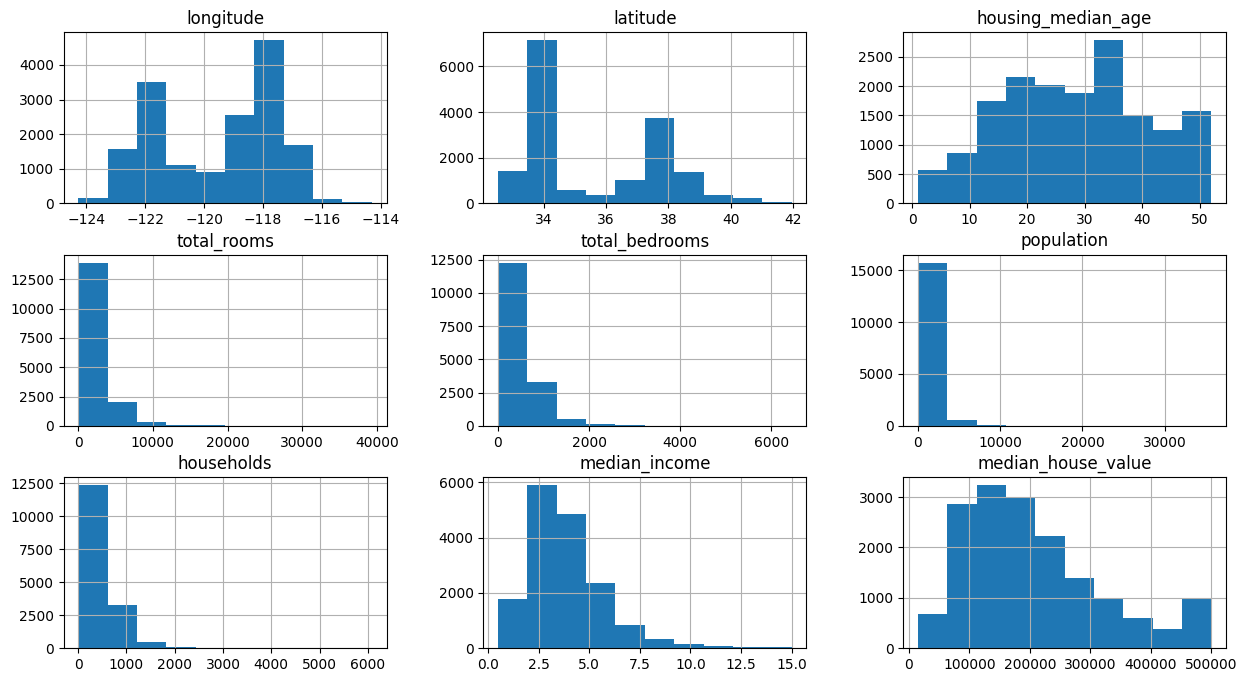

In [15]:
train_data.hist(figsize=(15, 8)); # We notice 4 features look skewed

In [16]:
train_data.drop(["ocean_proximity"], axis=1).corr() # Looking for correlation between the data; dropped a troublesome column, temporarily

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925162,-0.115653,0.049439,0.071912,0.101630,0.059914,-0.015564,-0.045013
latitude,-0.925162,1.000000,0.019124,-0.041390,-0.070028,-0.109673,-0.074994,-0.079653,-0.144488
housing_median_age,-0.115653,0.019124,1.000000,-0.361195,-0.321536,-0.294468,-0.304469,-0.123936,0.101619
total_rooms,0.049439,-0.041390,-0.361195,1.000000,0.931679,0.855196,0.920061,0.199550,0.134802
total_bedrooms,0.071912,-0.070028,-0.321536,0.931679,1.000000,0.876293,0.980029,-0.004037,0.052524
population,0.101630,-0.109673,-0.294468,0.855196,0.876293,1.000000,0.905561,0.006304,-0.025838
households,0.059914,-0.074994,-0.304469,0.920061,0.980029,0.905561,1.000000,0.016604,0.066983
median_income,-0.015564,-0.079653,-0.123936,0.199550,-0.004037,0.006304,0.016604,1.000000,0.688029
median_house_value,-0.045013,-0.144488,0.101619,0.134802,0.052524,-0.025838,0.066983,0.688029,1.000000


<Axes: >

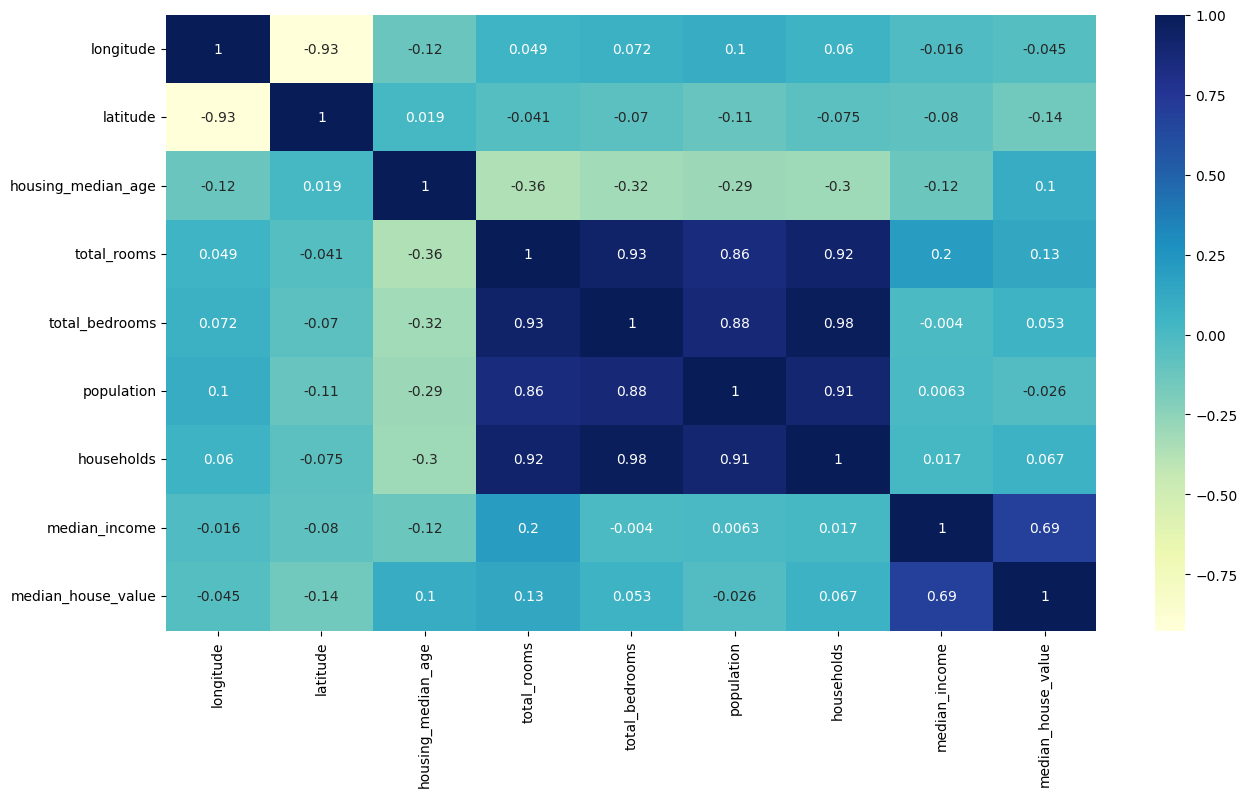

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.drop(["ocean_proximity"], axis=1).corr(), annot=True, cmap="YlGnBu") # Same as before but pretty

## Data Preprocessing

In [18]:
# We take the skewed features and find their logarithm
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["total_rooms"] + 1)

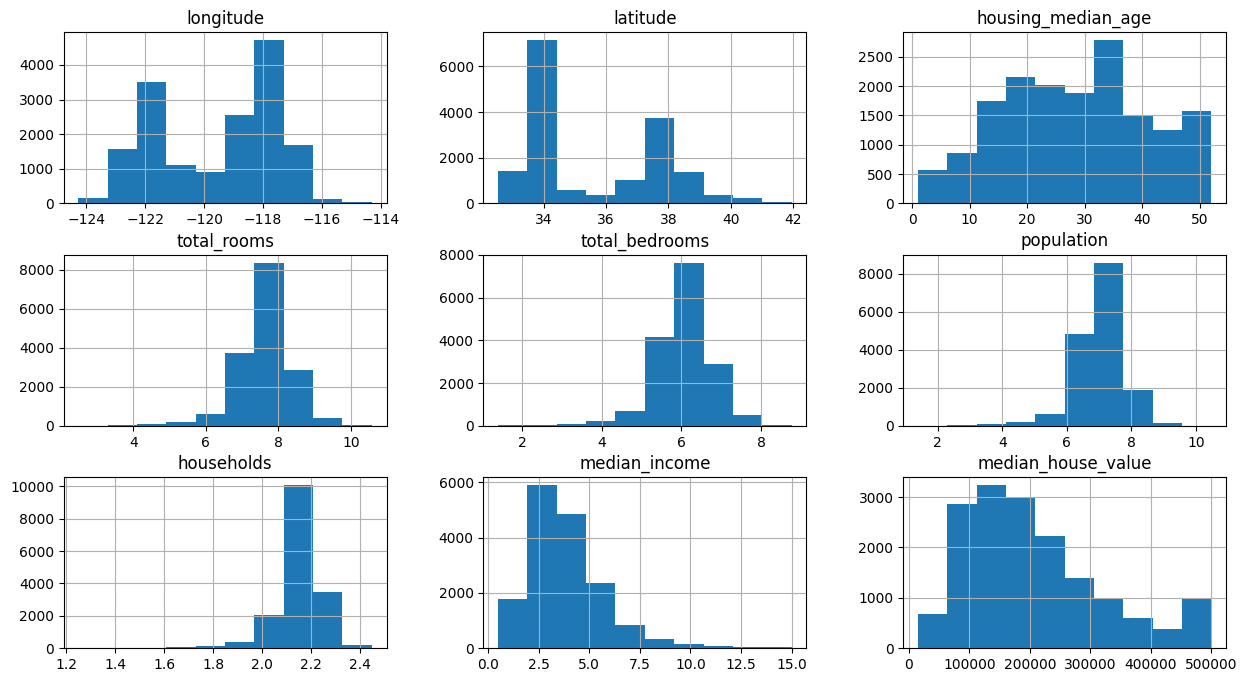

In [19]:
# We notice they now better resemble a Gaussian bell curve
train_data.hist(figsize=(15, 8));

In [20]:
# We now attempt to better represent the ocean_proximity feature
train_data.ocean_proximity.value_counts() # We will turn each value into its own feature

ocean_proximity
<1H OCEAN     7248
INLAND        5187
NEAR OCEAN    2102
NEAR BAY      1807
ISLAND           2
Name: count, dtype: int64

In [21]:
pd.get_dummies(train_data.ocean_proximity) # We have turned each value into its own feature

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9248,False,True,False,False,False
9136,True,False,False,False,False
11223,True,False,False,False,False
10316,True,False,False,False,False
12862,False,True,False,False,False
...,...,...,...,...,...
8168,False,False,False,False,True
10311,True,False,False,False,False
16234,False,True,False,False,False
16543,False,True,False,False,False


In [22]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)) # We append the new features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9248,-120.07,36.96,34.0,7.284821,5.480639,6.324359,2.114425,3.6181,INLAND,96500.0,False,True,False,False,False
9136,-118.40,34.41,22.0,8.399310,6.329721,7.361375,2.240636,10.0285,<1H OCEAN,500001.0,True,False,False,False,False
11223,-117.94,33.81,33.0,7.545390,5.814131,6.838405,2.145392,4.2759,<1H OCEAN,238000.0,True,False,False,False,False
10316,-117.80,33.85,16.0,8.331345,6.458338,7.351800,2.233379,5.8060,<1H OCEAN,304900.0,True,False,False,False,False
12862,-121.39,38.69,30.0,7.971776,6.228511,7.319202,2.194084,3.8650,INLAND,88400.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8168,-118.15,33.80,44.0,7.542744,5.991465,7.063048,2.145082,3.1042,NEAR OCEAN,219800.0,False,False,False,False,True
10311,-117.77,33.88,8.0,8.491875,6.442540,7.635787,2.250436,8.1117,<1H OCEAN,410200.0,True,False,False,False,False
16234,-121.31,37.97,45.0,7.865188,6.120297,6.896694,2.182132,3.6667,INLAND,123100.0,False,True,False,False,False
16543,-121.23,37.79,23.0,7.593878,6.052089,7.089243,2.151050,2.7734,INLAND,116800.0,False,True,False,False,False


In [23]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1) # ocean_proximity is now obsolete

In [24]:
train_data # Verify how the data looks after the modifications

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9248,-120.07,36.96,34.0,7.284821,5.480639,6.324359,2.114425,3.6181,96500.0,False,True,False,False,False
9136,-118.40,34.41,22.0,8.399310,6.329721,7.361375,2.240636,10.0285,500001.0,True,False,False,False,False
11223,-117.94,33.81,33.0,7.545390,5.814131,6.838405,2.145392,4.2759,238000.0,True,False,False,False,False
10316,-117.80,33.85,16.0,8.331345,6.458338,7.351800,2.233379,5.8060,304900.0,True,False,False,False,False
12862,-121.39,38.69,30.0,7.971776,6.228511,7.319202,2.194084,3.8650,88400.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8168,-118.15,33.80,44.0,7.542744,5.991465,7.063048,2.145082,3.1042,219800.0,False,False,False,False,True
10311,-117.77,33.88,8.0,8.491875,6.442540,7.635787,2.250436,8.1117,410200.0,True,False,False,False,False
16234,-121.31,37.97,45.0,7.865188,6.120297,6.896694,2.182132,3.6667,123100.0,False,True,False,False,False
16543,-121.23,37.79,23.0,7.593878,6.052089,7.089243,2.151050,2.7734,116800.0,False,True,False,False,False


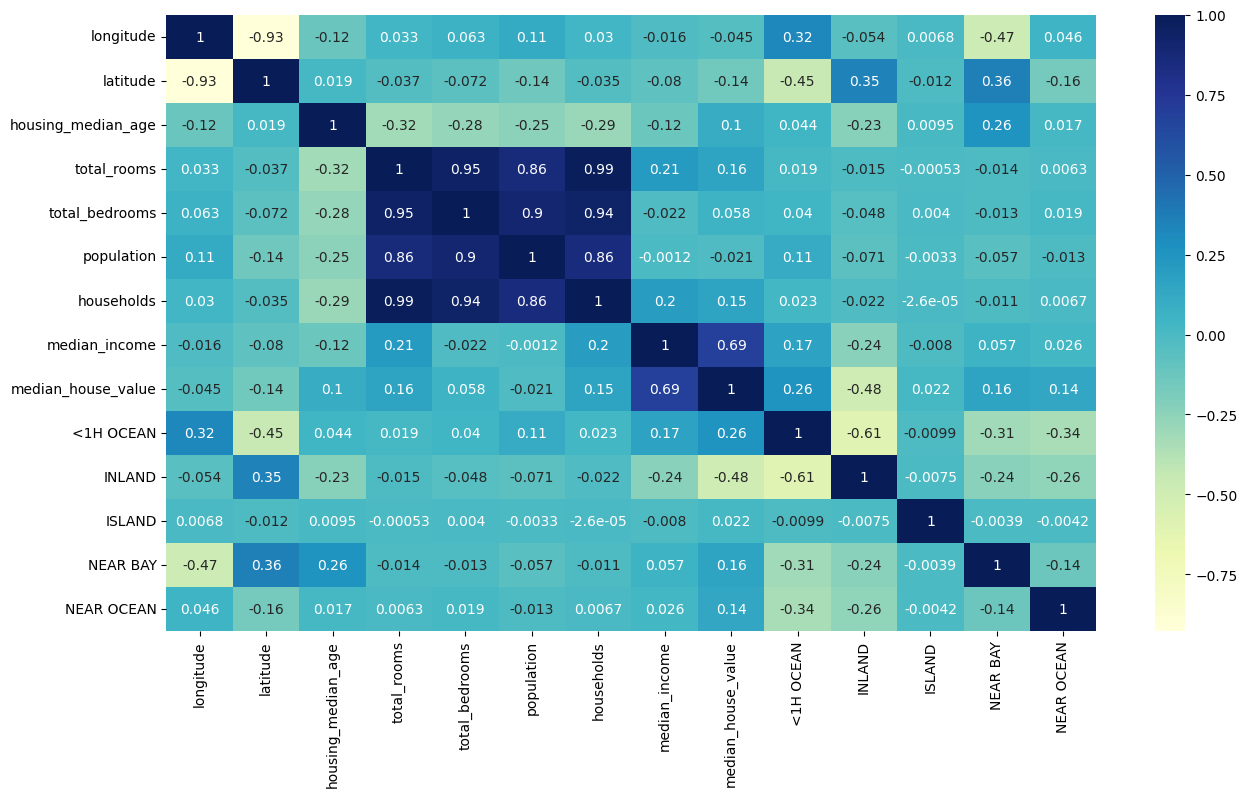

In [25]:
plt.figure(figsize=(15, 8)) # We can better observe the correlation between proximity to water and house price
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

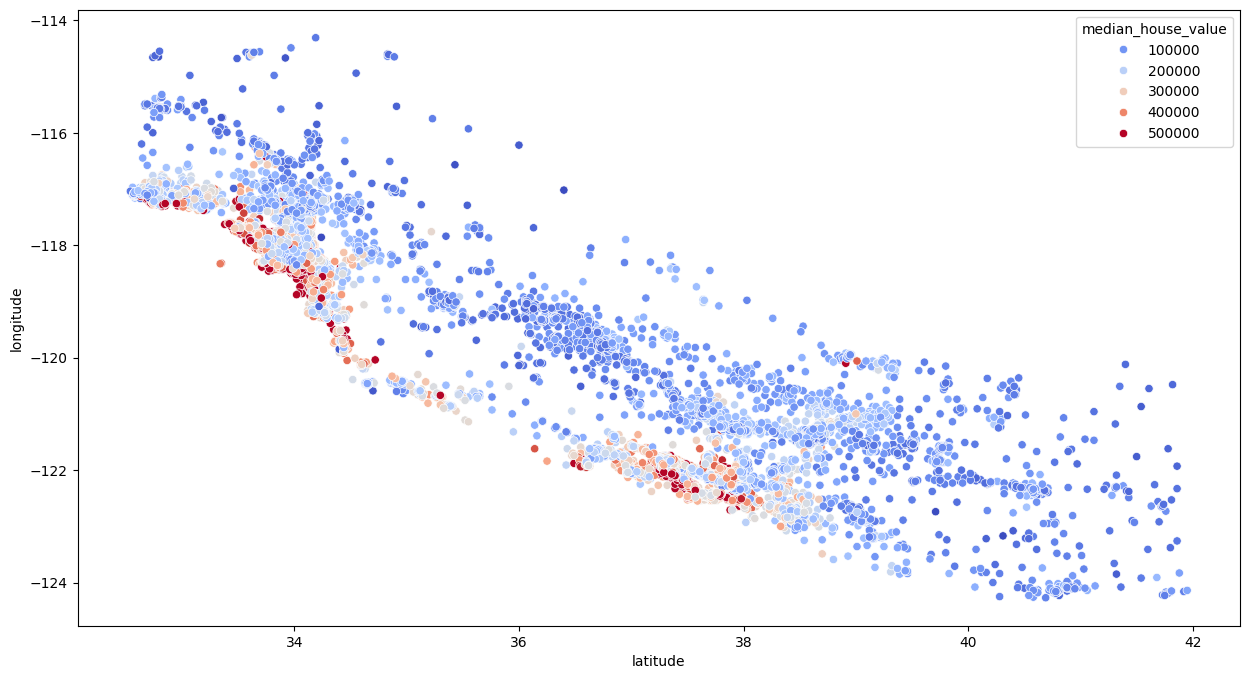

In [26]:
plt.figure(figsize=(15, 8)) # Interestingly, using a scatterplot allows us to notice where the coast would be situated on the map of California, as the prices increase near the ocean
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm");

## Feature Engineering

In [27]:
# Possibly insightful features
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

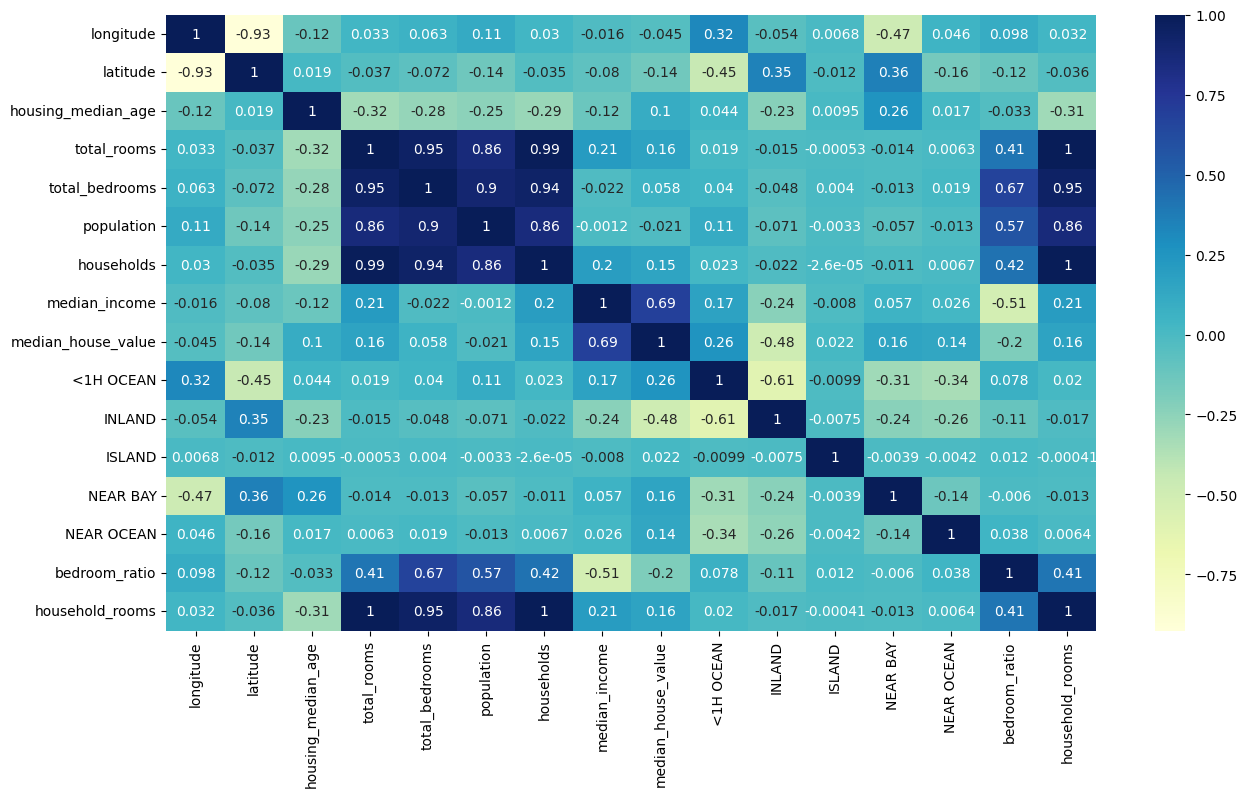

In [28]:
# Look for correlations between our new features and the rest of the data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");
# We notice that one of our new features, "household_rooms", is a bit more relevant than the standalone "households" feature

## Linear Regression Model